결정 트리를 실전에 빗대어 설명해 드릴게요.

### 🌳 결정 트리는 "스무고개" 게임입니다.

결정 트리는 데이터를 분류하거나 예측할 때, 마치 스무고개 게임을 하듯이 특정 질문들을 던져가며 정답을 찾아내는 알고리즘입니다.

* **뿌리 노드 (Root Node)**: 게임의 시작! 가장 첫 번째 질문을 던지는 단계입니다.
    * **실전 예시**: '고객이 우리 웹사이트에 한 달에 10번 이상 방문했습니까?'라는 질문으로 시작합니다. 
    
                    이 질문은 전체 고객을 '자주 방문한 그룹'과 '가끔 방문한 그룹'으로 나눕니다.


* **결정 노드 (Decision Node)**: 중간 단계의 질문을 계속하는 곳입니다.
    * **실전 예시**: '자주 방문한 그룹'에게 다시 '제품 상세 페이지를 5회 이상 클릭했습니까?'라고 질문합니다. 
                    
                    이 질문을 통해 고객을 더 세분화합니다.

* **리프 노드 (Leaf Node)**: 더 이상 질문할 필요가 없는 최종 단계입니다. 각 리프 노드가 최종 결론, 즉 예측 결과가 됩니다.
    * **실전 예시**: '자주 방문했고, 제품 페이지를 5회 이상 클릭했다면 **이 고객은 구매할 확률이 높다**'는 최종 결론을 내립니다.

=====


이처럼 결정 트리는 데이터를 가장 효과적으로 나눌 수 있는 질문을 자동으로 찾아내고, 

그 질문들을 나무 구조로 연결하여 직관적인 예측 모델을 만듭니다. 

덕분에 어떤 이유로 그러한 예측이 나왔는지 쉽게 이해할 수 있다는 장점이 있습니다.

======

네, 맞습니다. 노드가 시작되는 것은 **전처리된 데이터를 학습하면서** 입니다. 

모델은 전처리가 완료된 데이터를 바탕으로 가장 효과적인 질문(데이터를 가장 잘 나눌 수 있는 기준)을 찾아서 노드를 생성하고, 

그 질문을 통해 데이터를 분할하는 과정을 반복합니다.

결정 트리 모델은 다음과 같은 과정을 거쳐 노드를 만듭니다:

1.  **전처리된 데이터 입력:** 결측치 처리, 스케일링, 인코딩 등이 완료된 깨끗한 데이터가 모델에 입력됩니다.
2.  **질문 찾기 (학습):** 모델은 이 데이터를 분석하여 

                        어떤 특성(예: '웹사이트 방문 횟수', '클릭 횟수')과 

                        어떤 기준값(예: '10회', '5회')으로 데이터를 나누어야 가장 효율적인지 스스로 학습합니다.
3.  **노드 생성:** 학습된 질문을 바탕으로 **뿌리 노드**와 **결정 노드**가 만들어지고, 데이터를 계속해서 분할해 나갑니다.
4.  **최종 결론 (예측):** 더 이상 데이터를 나눌 필요가 없을 때 **리프 노드**를 생성하고, 최종 결론을 내립니다.

따라서 노드는 전처리가 끝난 데이터를 기반으로 학습하는 과정에서 만들어지는 결과물이라고 이해하시면 됩니다.

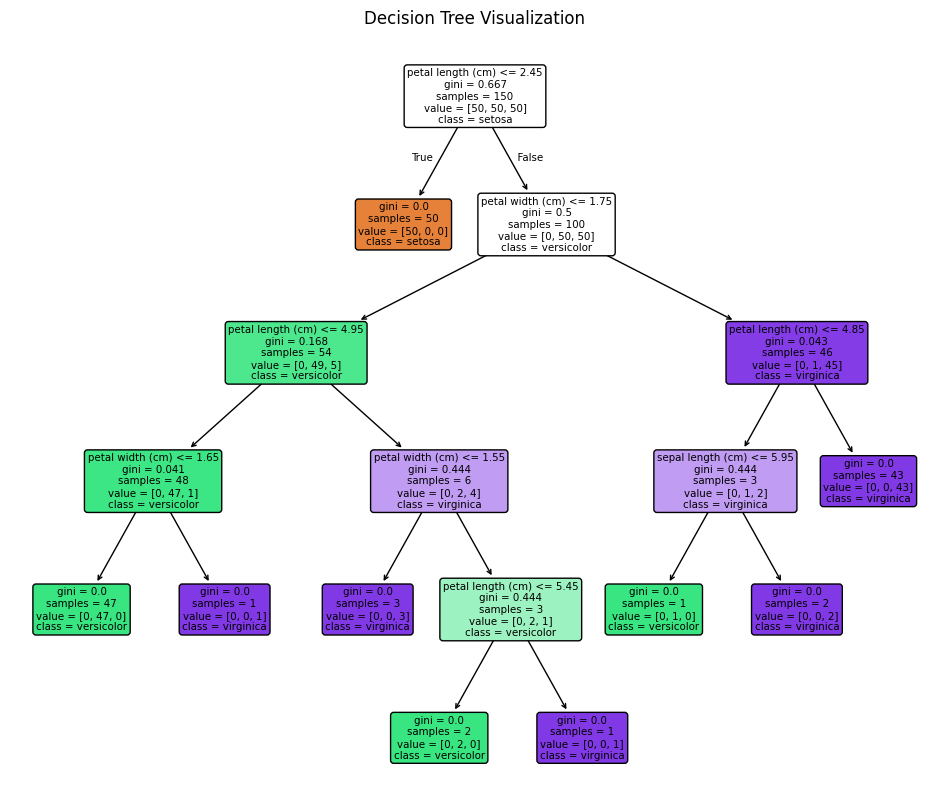

In [2]:
# 라이브러리 불러오기
from sklearn.datasets import load_iris              # 붓꽃 데이터셋 불러오기
from sklearn.tree import DecisionTreeClassifier, plot_tree # 결정 트리 모델과 시각화 함수 불러오기
import matplotlib.pyplot as plt                     # 그래프를 그리기 위한 라이브러리

# 붓꽃(iris) 데이터 불러오기
iris = load_iris()
X = iris.data                                       # 문제(특성) 데이터
y = iris.target                                     # 정답(레이블) 데이터
feature_names = iris.feature_names                  # 특성(컬럼) 이름
target_names = iris.target_names                    # 정답(클래스) 이름

# 결정 트리 모델 생성 및 학습
dt_clf = DecisionTreeClassifier(random_state=42)    # 결정 트리 모델 객체 생성 (재현성을 위해 시드 고정)
dt_clf.fit(X, y)                                    # 모델에 문제(X)와 정답(y)을 넣어 학습

# 결정 트리 시각화
plt.figure(figsize=(12, 10))                        # 그래프 크기 설정
plot_tree(dt_clf,                                   # 시각화할 모델 지정
          filled=True,                              # 노드 색상 채우기
          rounded=True,                             # 노드 모서리 둥글게 만들기
          feature_names=feature_names,              # 각 노드의 질문에 특성 이름 표시
          class_names=target_names)                 # 각 리프 노드에 정답 이름 표시
plt.title("Decision Tree Visualization")            # 그래프 제목 설정
plt.show()                                          # 그래프 화면에 표시
